Original Image


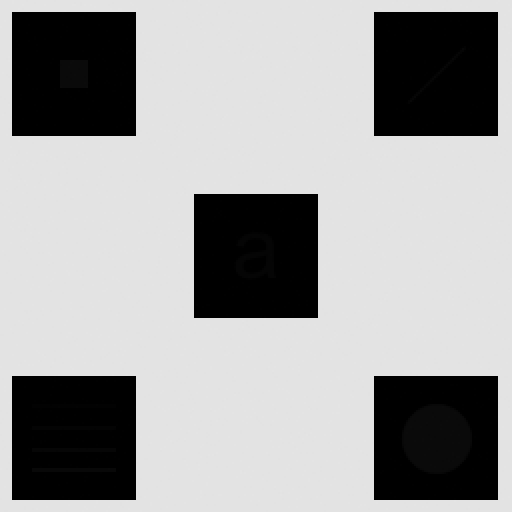



160.65635681152344 102.9979258068639


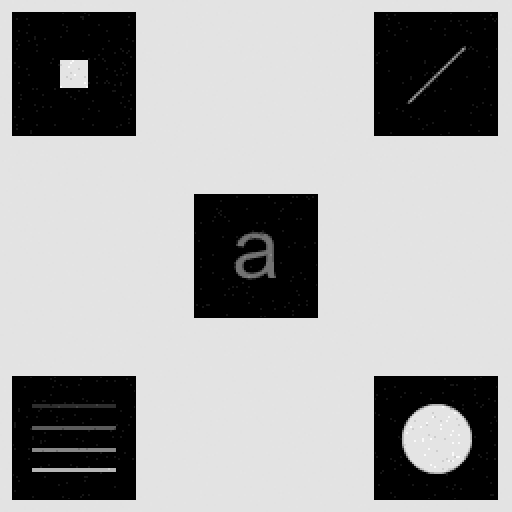

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math

img = cv2.imread('local_hist.tif', 0)
print("Original Image")
cv2_imshow(img)
print("\n")

def local_enhancement_convolve(img, kernel, padding, stride):
  new_img = np.zeros(shape = (img.shape[0] + 2 * padding, img.shape[1] + 2 * padding), dtype = np.float32)
  mg = np.mean(img.flatten())
  stdg = np.std(img.flatten())
  print(mg, stdg)
  k0, k1, k2, k3 = 0, 0.25, 0, 0.1
  C = 22.8

  for row in range(img.shape[0]):
    for col in range(img.shape[1]):
      new_img[row + padding][col + padding] = img[row][col]

  mod_img = np.zeros(shape = (img.shape[0], img.shape[1]), dtype = np.float32)
  for row in range(0, new_img.shape[0], stride):
    for col in range(0, new_img.shape[1], stride):
      if ((row + kernel.shape[0]) <= new_img.shape[0] and (col + kernel.shape[1]) <= new_img.shape[1]):
        temp = new_img[row: row + kernel.shape[0], col: col + kernel.shape[1]]
        temp_conv = temp * kernel
        local_mean = np.mean(temp)
        local_std = np.std(temp)

        if ((k0 * mg) <= local_mean <= (k1 * mg) and (k2 * stdg) <= local_std <= (k3 * stdg)):
          mod_img[row][col] = C * img[row][col]
        else:
          mod_img[row][col] = img[row][col]

  return mod_img

cv2_imshow(local_enhancement_convolve(img, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]), 1, 1))